<a href="https://colab.research.google.com/github/muhammed3ly/CNN-Assignment/blob/master/.ipynb_checkpoints/CNN%20assignment-checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%pylab inline
import os
import numpy as np
import pandas as pd
import h5py
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer, AveragePooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
random.seed(10)

Populating the interactive namespace from numpy and matplotlib


In [0]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [65]:
classes = np.unique(trainY)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

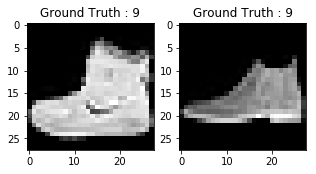

In [66]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(trainX[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(trainY[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(testX[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(testY[0]))

In [67]:
trainX = trainX.reshape(-1, 28,28, 1)
testX = testX.reshape(-1, 28,28, 1)
trainX.shape, testX.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
testX /= 255.0
trainX /= 255.0

In [69]:
trainY = to_categorical(trainY)
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
testY = to_categorical(testY)
testY

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
trainX,validX,trainY,validY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [75]:

#train_x = train_x.reshape(1, 48000, 28, 28)
# define vars
input_reshape = (28, 28, 1)

pool_size = (2, 2)

hidden_num_units = 30
output_num_units = 10

epochs = 35
batch_size = 64

model = Sequential([
 Convolution2D(32, kernel_size = (3, 3) ,activation='relu',input_shape=(28,28,1)),
 Convolution2D(64, 3, 3, activation='relu', name = 'Conv1'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling1'),

 Convolution2D(128, 3, 3, activation='relu', name = 'Conv2'),
 MaxPooling2D(pool_size=pool_size, name = 'Pooling2'),
# Convolution2D(64, 3, 3, activation='relu', name = 'Conv3'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu', name = 'Dense1'),
 Dropout(0.6),
 Dense(output_dim=output_num_units, activation='softmax', name = 'out'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
Conv1 (Conv2D)               (None, 24, 24, 64)        18496     
_________________________________________________________________
Pooling1 (MaxPooling2D)      (None, 12, 12, 64)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 10, 10, 128)       73856     
_________________________________________________________________
Pooling2 (MaxPooling2D)      (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3200)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 30)                96030     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="Conv1")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="Conv2")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", name="Dense1", units=30)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", name="out", units=10)`


In [76]:
trained_model_conv = model.fit(trainX, trainY, nb_epoch=epochs, batch_size = batch_size, validation_data=(validX, validY))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/35
48000/48000 [==============================] - 17s 345us/step - loss: 1.0964 - acc: 0.5886 - val_loss: 0.5160 - val_acc: 0.8095
Epoch 2/35
48000/48000 [==============================] - 14s 293us/step - loss: 0.7792 - acc: 0.7069 - val_loss: 0.4365 - val_acc: 0.8588
Epoch 3/35
48000/48000 [==============================] - 14s 296us/step - loss: 0.6804 - acc: 0.7435 - val_loss: 0.3865 - val_acc: 0.8648
Epoch 4/35
48000/48000 [==============================] - 14s 293us/step - loss: 0.6240 - acc: 0.7700 - val_loss: 0.3677 - val_acc: 0.8688
Epoch 5/35
48000/48000 [==============================] - 14s 291us/step - loss: 0.5866 - acc: 0.7859 - val_loss: 0.3155 - val_acc: 0.8940
Epoch 6/35
48000/48000 [==============================] - 14s 292us/step - loss: 0.5627 - acc: 0.7926 - val_loss: 0.3122 - val_acc: 0.8945
Epoch 7/35
48000/48000 [==============================] - 14s 289us/step - loss: 0.5317 - acc: 0.8070 - val_loss: 0.

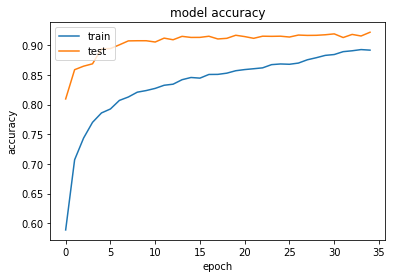

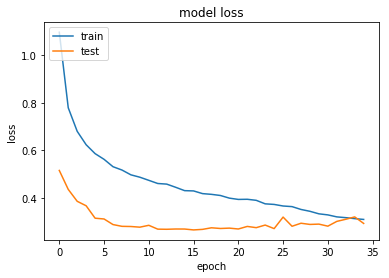

In [77]:
# summarize history for accuracy
plt.plot(trained_model_conv.history['acc'])
plt.plot(trained_model_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model_conv.history['loss'])
plt.plot(trained_model_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()